# 투빅스 17기 정규세션 WEEK1. EDA_나다경

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings(action='ignore')
%matplotlib inline

# matplotlib 테마
plt.style.use('seaborn')
# 그래프에서 한글 깨지는 현상 방지
plt.rc('font', family='Malgun Gothic')
# 그래프에서 마이너스 기호가 표시되도록
plt.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
data = df.copy()

# Data Set Description

* index
* gender: 성별
* car: 차량 소유 여부
* reality: 부동산 소유 여부
* child_num: 자녀 수
* income_total: 연간 소득
* income_type: 소득 분류
    * ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

* edu_type: 교육 수준
    * ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

* family_type: 결혼 여부
    * ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

* house_type: 생활 방식
    * ['Municipal apartment', 'House / apartment', 'With parents',

        * 'Co-op apartment', 'Rented apartment', 'Office apartment']

* DAYS_BIRTH: 출생일
    * 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

* DAYS_EMPLOYED: 업무 시작일
    * 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

    * 양수 값은 고용되지 않은 상태를 의미함

* FLAG_MOBIL: 핸드폰 소유 여부
* work_phone: 업무용 전화 소유 여부
* phone: 전화 소유 여부
* email: 이메일 소유 여부
* occyp_type: 직업 유형													
* family_size: 가족 규모
* begin_month: 신용카드 발급 월
    * 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

* credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    * => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [4]:
#pip install dataprep

In [5]:
from dataprep.eda import *
import pandas as pd

NumExpr defaulting to 8 threads.


  0%|                                                                                          | 0/746 [00:00<…


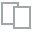
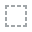
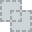
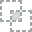
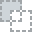
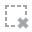
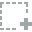
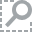
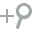
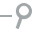
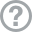
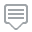
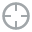
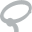
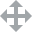
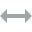
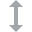
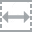
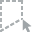
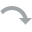
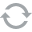
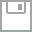
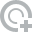
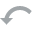
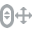
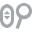
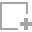
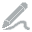
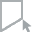
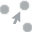
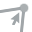
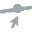

In [6]:
plot(data)

## 1. Data Cleaning

### 1.1. 결측치 처리(과제)

In [7]:
data.head()

index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   

    occyp_type  family_size  begin_month  credit  
0          NaN          2.0         -6.0     1.0  
1     Laborers          3.0         -5.0     1.0  
2     Managers          2.0        -22.0     2.0  
3  Sales staff          2.0        -37.0     0.0  
4     Managers          2.0        -26.0     2.0

In [8]:
data.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

`occyp_type`에 8,171개의 결측치가 존재함을 알 수 있음. 따라서 제거해줌.

In [9]:
data.drop('occyp_type', axis=1, inplace=True)

In [10]:
data.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
dtype: int64

결측치가 없는 것을 확인할 수 있음.

### 1.3 불필요한 feature 삭제

In [11]:
for column in data.columns:
    print(f'{column}: {data[column].nunique()}')

index: 26457
gender: 2
car: 2
reality: 2
child_num: 9
income_total: 249
income_type: 5
edu_type: 5
family_type: 5
house_type: 6
DAYS_BIRTH: 6621
DAYS_EMPLOYED: 3470
FLAG_MOBIL: 1
work_phone: 2
phone: 2
email: 2
family_size: 10
begin_month: 61
credit: 3


`index`의 unique값이 26,457개로 분석에 필요하지 않으며, `FLAG_MOBIL`의 unique값은 1개이므로 모두가 휴대폰을 소지하고 있기에 제거함.

In [12]:
data.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

### 1.4. 중복데이터 이슈

제공된 데이터에서는 인덱스열을 제외한 다른 변수값이 중복으로 존재하는 데이터가 있음. EDA에서는 제거하나 추후 분석 시 이에 대한 고려가 필요함.

In [13]:
# 모든 값이 중복되는 데이터는 하나만 남기고 모두 제거

# 중복 개수 확인
print("제거할 데이터 개수:", data.duplicated().sum())
print("중복 제거 전 shape:", data.shape)

# 모두 중복되는 샘플 제거
data.drop_duplicates(inplace=True)
print("모두 중복되는 샘플 제거 후 shape:", data.shape)

제거할 데이터 개수: 1634
중복 제거 전 shape: (26457, 17)
모두 중복되는 샘플 제거 후 shape: (24823, 17)


## 2. EDA

### 2.1. 이상치 탐색

In [14]:
data.describe()

child_num  income_total   DAYS_BIRTH  DAYS_EMPLOYED    work_phone  \
count  24823.000000  2.482300e+04  24823.00000   24823.000000  24823.000000   
mean       0.431052  1.868772e+05 -15950.93647   59114.720139      0.225235   
std        0.750627  1.008704e+05   4204.79398  137516.304166      0.417745   
min        0.000000  2.700000e+04 -25152.00000  -15713.000000      0.000000   
25%        0.000000  1.215000e+05 -19426.00000   -3153.000000      0.000000   
50%        0.000000  1.575000e+05 -15534.00000   -1539.000000      0.000000   
75%        1.000000  2.250000e+05 -12443.00000    -407.500000      0.000000   
max       19.000000  1.575000e+06  -7705.00000  365243.000000      1.000000   

              phone         email   family_size   begin_month        credit  
count  24823.000000  24823.000000  24823.000000  24823.000000  24823.000000  
mean       0.294284      0.091528      2.198767    -26.055876      1.514442  
std        0.455729      0.288364      0.919210     16.531935      0.704526  
min        0.000000      0.000000      1.000000    -60.000000      0.000000  
25%        0.000000      0.000000      2.000000    -39.000000      1.000000  
50%        0.000000      0.000000      2.000000    -24.000000      2.000000  
75%        1.000000      0.000000      3.000000    -12.000000      2.000000  
max        1.000000      1.000000     20.000000      0.000000      2.000000

* `child_num`의 max가 19로 최대 자녀 수는 19명임을 알 수 있음.
* `DAYS_EMPLOYED`의 max가 365,243으로 고용되지 않은 상태임을 알 수 있고 수정이 필요함.

In [15]:
num_feature = ['child_num','income_total','DAYS_BIRTH','DAYS_EMPLOYED',
               'work_phone','phone','email','family_size','begin_month','credit']

In [16]:
cate_feature = ['gender','car','reality','income_type','edu_type','family_type',
                'house_type']

Text(0.5, 0.98, 'Histogram (Numerical Variables)')

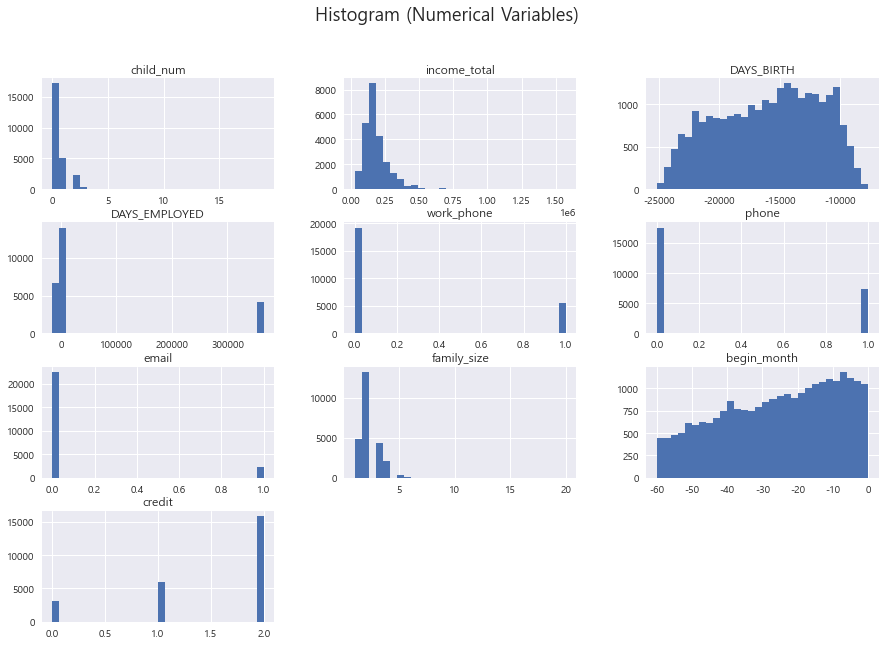

In [17]:
data[num_feature].hist(bins=30, figsize=(15,10))
plt.suptitle('Histogram (Numerical Variables)', fontsize=18)

### 2.2. 변수 시각화(과제)

In [18]:
def pie_plot(feature):
    plt.figure(figsize=(9,6))
    data[feature].value_counts().plot.pie(autopct='%1.1f%%')

In [19]:
def count_plot(feature):
    plt.figure(figsize=(9,6))
    g1 = sns.countplot(data=data, x=feature)
    g1.set_title(f'{feature} Distribution')
    plt.show()

In [20]:
def count_plot2(feature):
    plt.figure(figsize=(9,6))
    g22 = sns.countplot(data=data, x=feature, hue='credit')
    g22.set_title(f'{feature} : credit level')
    plt.show()

In [21]:
def bar_plot(feature):
    plt.figure(figsize=(9,6))
    g2 = sns.barplot(x=data[feature],y=data['credit'])
    g2.set_title(f"{feature} Distribution by credit")
    plt.xticks(rotation=45)
    plt.show()

In [22]:
def violin_plot(feature):
    plt.figure(figsize=(9,6))
    g3 = sns.violinplot('credit', feature, data=data, split=True)
    g3.set_title(f"{feature} and credit")
    plt.show()

**credit(TARGET)**

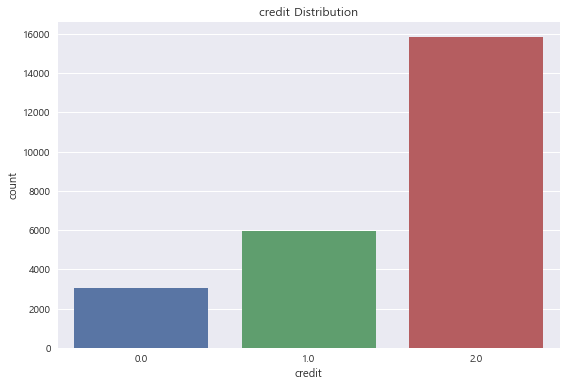

In [23]:
count_plot('credit')

target 변수인 `credit`은 2.0이 0.0과 1.0보다 훨씬 많은 **imbalance set**인 것을 확인할 수 있음.

0일수록 신용이 큰 값을 나타내며 고신용자 수는 적음

**gender**

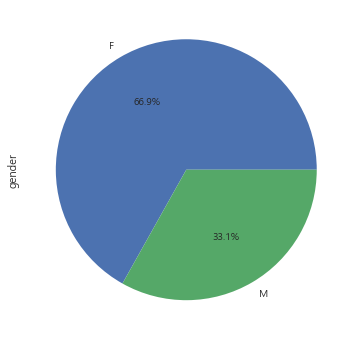

In [24]:
pie_plot("gender")

Female이 Male의 약 2배임을 알 수 있음.

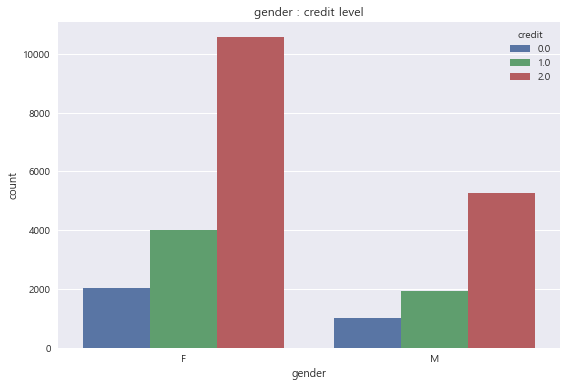

In [25]:
count_plot2('gender')

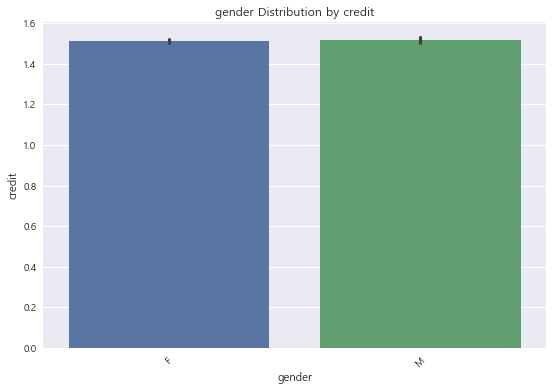

In [26]:
bar_plot('gender')

전체적인 데이터 비율에서 남성과 여성의 차이는 없음.

여성이 수집된 데이터량이 2배 더 많고, 신용점수별로 결과 값 또한 약 2배 차이가 남.

**DAYS_BIRTH**

**Assumption**: 50만명의 신용등급 추이를 분석한 결과, 20대는 중·고신용 대출자의 27.9%가 금융위기 이후 7등급 이하 저신용자가 됐으며 이 비율은 30대(16.2%), 40대(14.0%), 50대(11.9%), 60대 이상(9.6%) 순이라고 소개함.  ('금융위기 이후 저신용 가계차주 현황' 보고서) 따라서 `나이가 많을 수록 신용이 높을 것이다.`

In [27]:
# DAYS_BIRTH(출생일) 변환 작업
# 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
data['Age'] = round(abs(data['DAYS_BIRTH'])/365,0).astype(np.int32)
data.head()

gender car reality  child_num  income_total           income_type  \
0      F   N       N          0      202500.0  Commercial associate   
1      F   N       Y          1      247500.0  Commercial associate   
2      M   Y       Y          0      450000.0               Working   
3      F   N       Y          0      202500.0  Commercial associate   
4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  work_phone  phone  email  family_size  \
0      -13899          -4709           0      0      0          2.0   
1      -11380          -1540           0      0      1          3.0   
2      -19087          -4434           0      1      0          2.0   
3      -15088          -2092           0      1      0          2.0   
4      -15037          -2105           0      0      0          2.0   

   begin_month  credit  Age  
0         -6.0     1.0   38  
1         -5.0     1.0   31  
2        -22.0     2.0   52  
3        -37.0     0.0   41  
4        -26.0     2.0   41

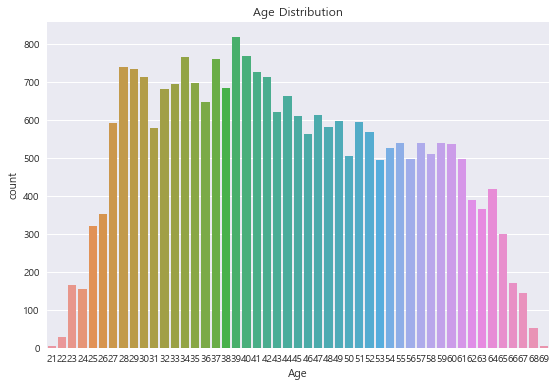

In [28]:
count_plot('Age')

30, 40, 50대가 주를 이루고 있음.

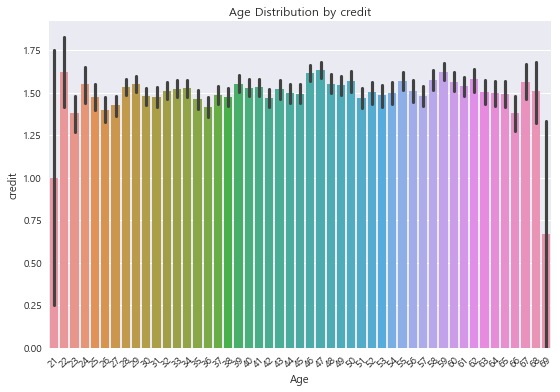

In [29]:
bar_plot('Age')

`credit`은 사용자의 신용카드 대금 연체를 기준으로 한 신용도로, 낮을 수록 높은 신용의 신용카드 사용자를 의미함. 67, 68세를 제외한 60대는 신용도가 높아지는 것을 확인할 수 있음. 눈에 띄는 것은 21세의 신용도가 높은 점임.

-> 60세 이상은 어느 정도 기반을 잡고 경제적으로 안정됐기에, 21세는 아직 신용카드를 쓰는 인원이 적기 때문이라고 생각할 수 있음.

**car**

**Assumption**: 자동차를 소유하기 위해서는 대출을 받아야 하기에 `차를 소유한 사람이 신용이 높을 것이다.`

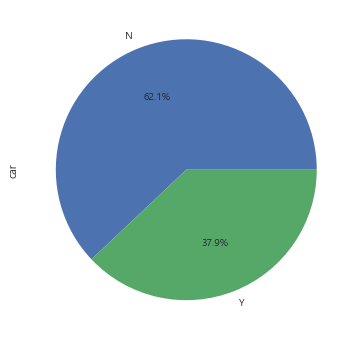

In [30]:
pie_plot('car')

차를 소유하지 않은 사람이 소유한 사람보다 2배 더 많음.

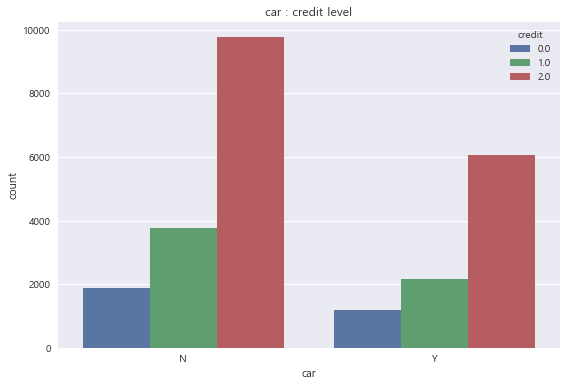

In [31]:
count_plot2('car')

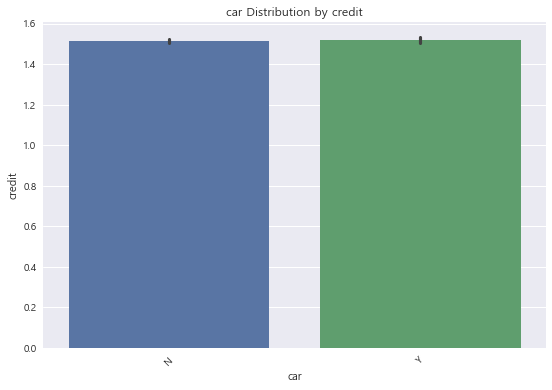

In [32]:
bar_plot('car')

차량 여부에 따른 신용도 또한 모든 비율이 비슷한 추이를 보임.

**reality**

**Assumption**: 집을 소유하기 위해서는 대출을 받아야 하기에 `집을 소유한 사람이 신용이 높을 것이다.`

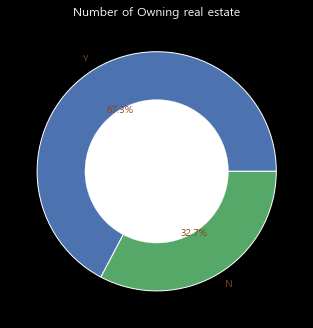

In [33]:
df1 = data['reality'].value_counts()
my_circle = plt.Circle((0,0), 0.6, color='white')
fig = plt.figure()
plt.pie(df1, labels=df1.index, wedgeprops={'linewidth':1, 'edgecolor':'white'}, autopct='%1.1f%%', textprops={'color':"saddlebrown"})
p = plt.gcf()
p.gca().add_artist(my_circle)
fig.patch.set_facecolor('Black')
plt.title('Number of Owning real estate', color='white')
plt.show()

부동산을 소유한 사람이 소유하지 않은 사람보다 2배 더 많음. <-> 차와는 반대의 결과

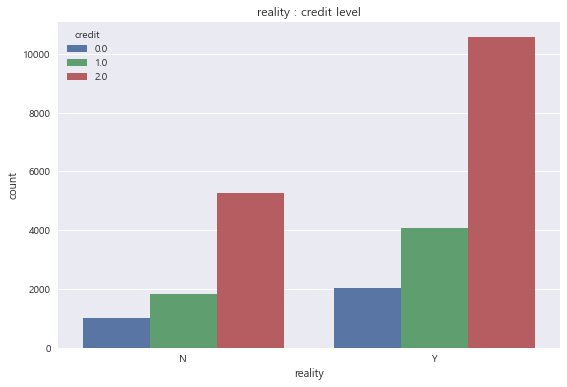

In [34]:
count_plot2('reality')

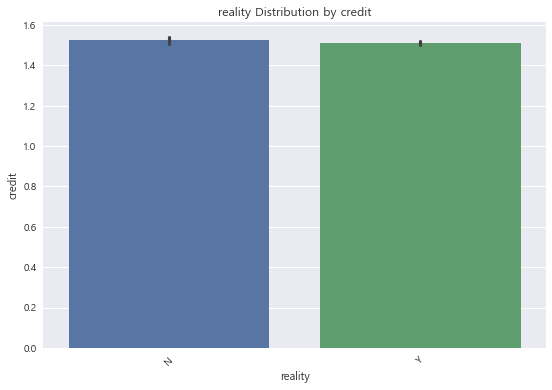

In [35]:
bar_plot('reality')

이번에도 큰 차이를 발견하지 못함.

**income_type**

**Assumption**: 노동을 하고 있는 사람이 소득이 꾸준하게 있기 때문에 연금 수령자나 학생보다는 `노동을 하는 사람이 신용이 높을 것이다.`

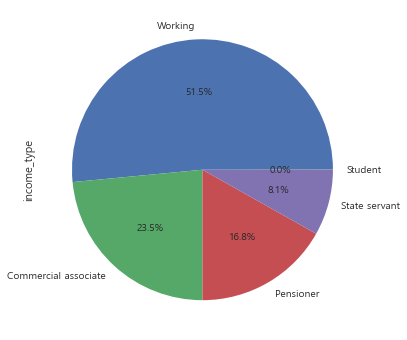

In [36]:
pie_plot('income_type')

대부분 노동자임을 알 수 있음. 학생은 0%임.

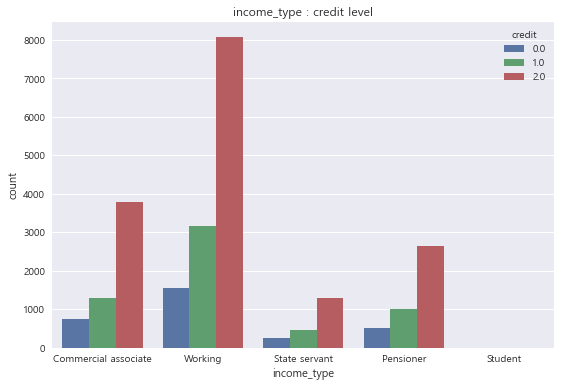

In [37]:
count_plot2('income_type')

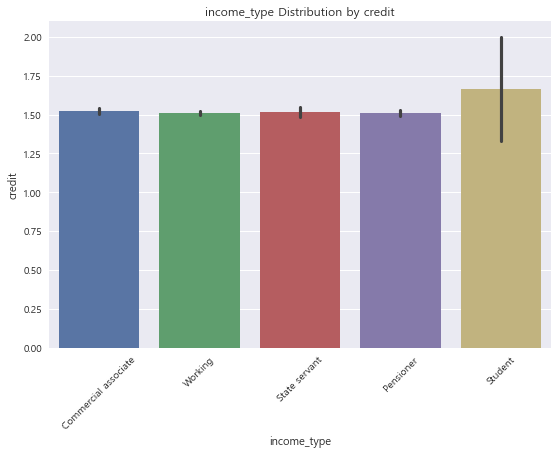

In [38]:
bar_plot('income_type')

큰 차이를 보이지 않음. 다만 Student의 경우 분포의 차이 반영에 의문. 

**edu_type**

**Assumption**: `학력이 높을수록 신용이 높을 것이다.`

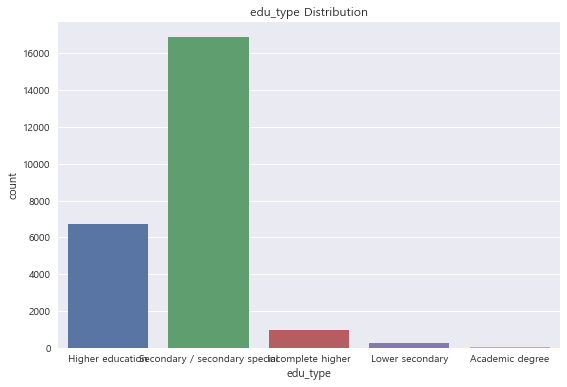

In [39]:
count_plot('edu_type')

Secondary인 사람이 가장 많고 그 뒤는 Higher education, Incomplete higer, Lower secondary가 뒤따름.

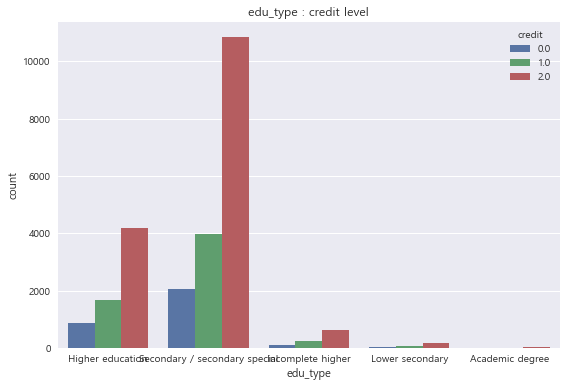

In [40]:
count_plot2('edu_type')

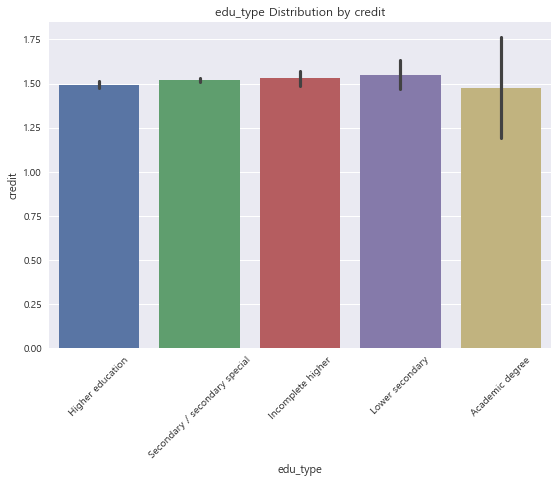

In [41]:
bar_plot('edu_type')

약간의 차이가 있으나 큰 차이가 없음.

**family_type**

**Assumption**: 결혼을 통해 안정적인 수입 때문에 `결혼을 한 사람이 신용이 높을 것이다.`

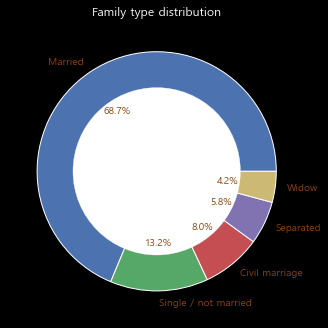

In [42]:
ft = data['family_type'].value_counts()
my_circle = plt.Circle((0,0), 0.7, color='white')
fig = plt.figure()
plt.pie(ft, labels=ft.index, wedgeprops={'linewidth':1, 'edgecolor':'white'}, autopct='%1.1f%%', textprops={'color':"saddlebrown"})
p = plt.gcf()
p.gca().add_artist(my_circle)
fig.patch.set_facecolor('Black')
plt.title('Family type distribution', color='white')
plt.show()

결혼한 사람이 대부분임을 확인할 수 있음.

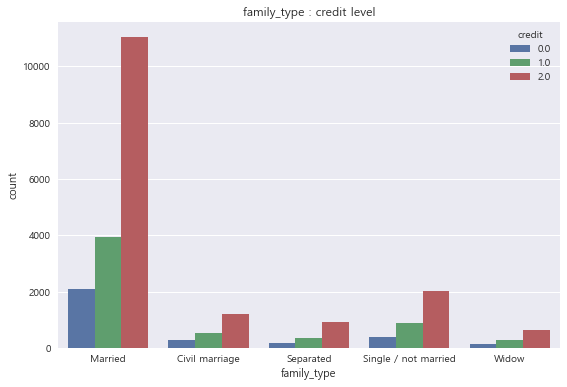

In [43]:
count_plot2('family_type')

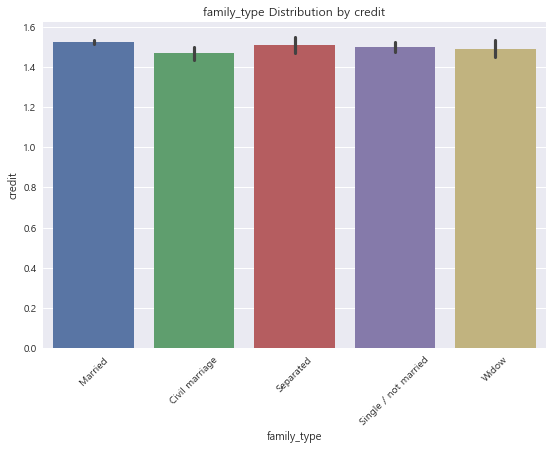

In [44]:
bar_plot('family_type')

가족 구성원에 따라 약간의 차이가 있으나 큰 차이를 보이지는 않음.

**DAYS_EMPLOYED**

**Assumption**: `일을 오래 한 사람이 신용이 높을 것이다.`

In [45]:
data['worked_year'] = [0 if s>=0 else round(abs(s)/365,0) for s in data['DAYS_EMPLOYED']]

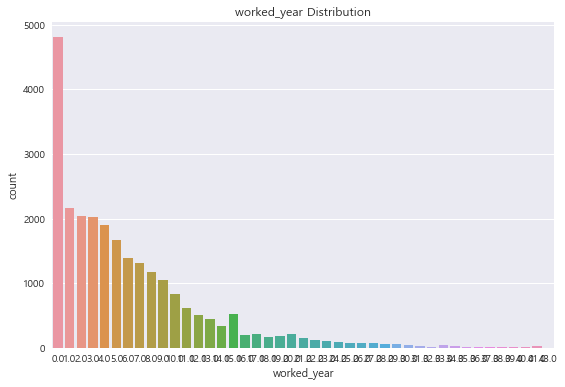

In [46]:
count_plot('worked_year')

일을 시작하지 않은 사람이 많은 것을 알 수 있음

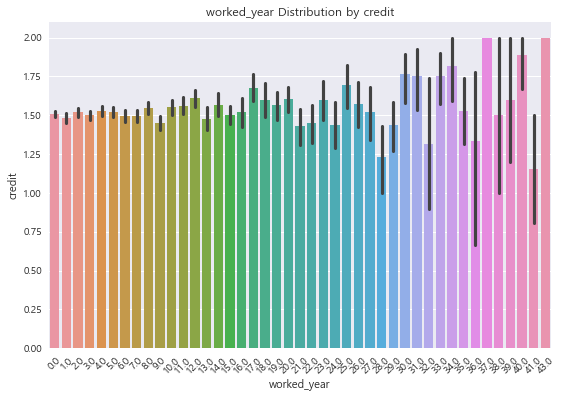

In [47]:
bar_plot('worked_year')

가정과는 다르게 업무를 오래 한 사람이 평균적으로 신용등급이 낮지는 않다.

**income total**

In [48]:
def box_plot(feature):
    plt.figure(figsize=(9,6))
    g3 = sns.boxplot(data=data, y=feature, width=0.3)
    g3.set_title(f'{feature} Distribution')
    plt.ylim(2000, 600000)
    plt.show()

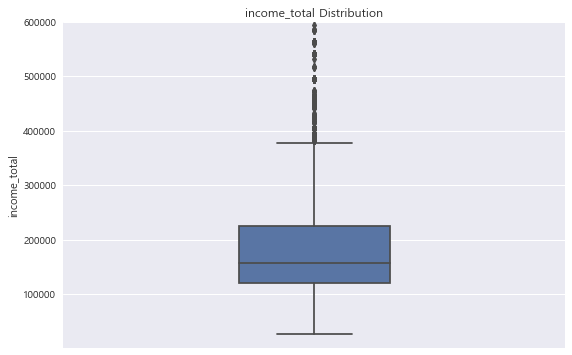

In [49]:
box_plot('income_total')

고소득자가 많은 것으로 보임.

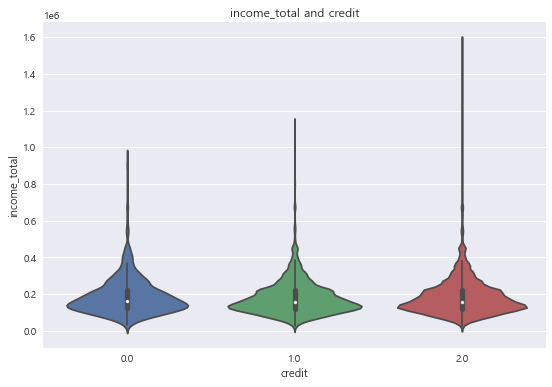

In [50]:
violin_plot('income_total')

분포가 크게 다르지 않음

**begin_month**

In [51]:
# begin_month: 신용카드 발급 월
# 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
data['Credit_card_issuance'] = [0 if s>=0 else round(abs(s)/12,2) for s in data['begin_month']]

In [52]:
def dis_plot(feature):
    plt.figure(figsize=(9,6))
    g4 = sns.displot(data=data, x=feature, kind='kde')
    title_color='black'
    plt.title('Average Credit Card Issuance Date', color=title_color)
    plt.show()

<Figure size 648x432 with 0 Axes>

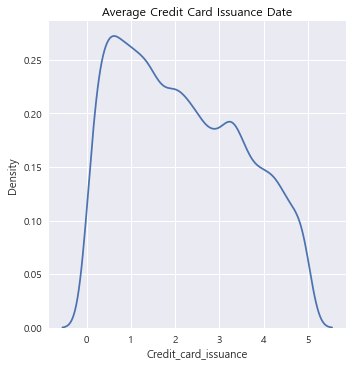

In [53]:
dis_plot('Credit_card_issuance')

대부분 신용카드 초기 사용자임

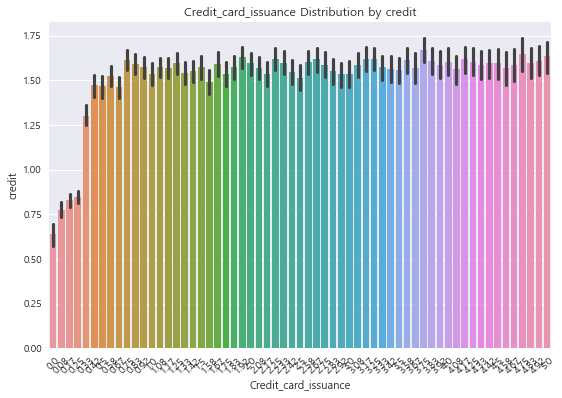

In [54]:
bar_plot('Credit_card_issuance')

신용카드 초기 사용자일수록 신용등급이 높음.

**child_num**

**Assumption**: 양육에 많은 돈이 들기 때문에 `아이의 수가 적을수록 신용이 높을 것이다.`

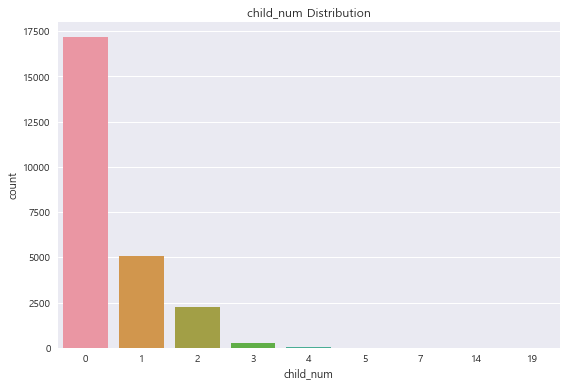

In [55]:
count_plot('child_num')

아이가 없는 사람의 수가 가장 많음.

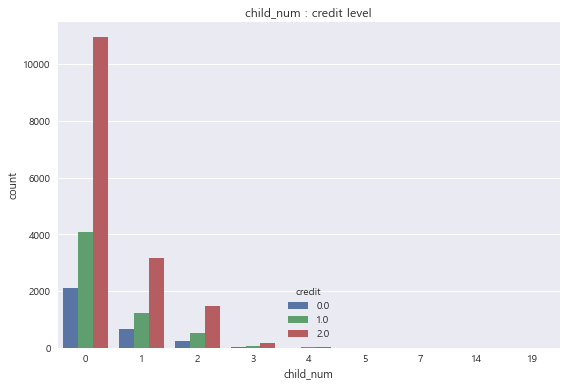

In [56]:
count_plot2('child_num')

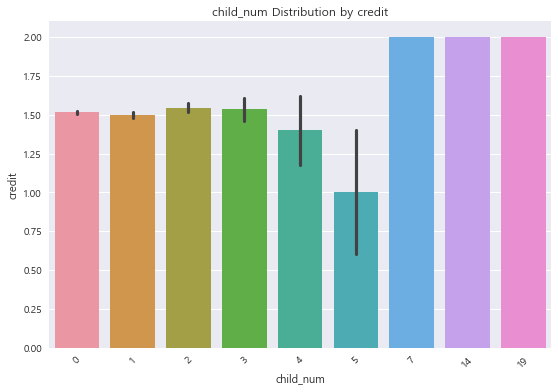

In [57]:
bar_plot('child_num')

가정과는 다르게 아이의 수가 5명일 경우 가장 신용도가 높음

## 3. 수치형 변수 간 상관관계 파악(과제)

In [58]:
num_cols_data_cor = data[['child_num','income_total','Age','worked_year',
               'work_phone','phone','email','family_size','Credit_card_issuance','credit']].corr()
num_cols_data_cor

child_num  income_total       Age  worked_year  \
child_num              1.000000      0.032285 -0.331470     0.041832   
income_total           0.032285      1.000000 -0.065777     0.084498   
Age                   -0.331470     -0.065777  1.000000    -0.018644   
worked_year            0.041832      0.084498 -0.018644     1.000000   
work_phone             0.051133     -0.035599 -0.180482     0.108101   
phone                 -0.011168      0.017112  0.029442     0.041728   
email                  0.015755      0.089086 -0.109480    -0.001025   
family_size            0.890896      0.023976 -0.297590     0.055745   
Credit_card_issuance   0.004910      0.018828  0.059335     0.080478   
credit                 0.005825      0.005274  0.024238     0.019090   

                      work_phone     phone     email  family_size  \
child_num               0.051133 -0.011168  0.015755     0.890896   
income_total           -0.035599  0.017112  0.089086     0.023976   
Age                    -0.180482  0.029442 -0.109480    -0.297590   
worked_year             0.108101  0.041728 -0.001025     0.055745   
work_phone              1.000000  0.309731 -0.031348     0.068687   
phone                   0.309731  1.000000  0.011768    -0.000480   
email                  -0.031348  0.011768  1.000000     0.014652   
family_size             0.068687 -0.000480  0.014652     1.000000   
Credit_card_issuance    0.007943  0.012396 -0.002863     0.020310   
credit                 -0.002498  0.003388  0.012133     0.009937   

                      Credit_card_issuance    credit  
child_num                         0.004910  0.005825  
income_total                      0.018828  0.005274  
Age                               0.059335  0.024238  
worked_year                       0.080478  0.019090  
work_phone                        0.007943 -0.002498  
phone                             0.012396  0.003388  
email                            -0.002863  0.012133  
family_size                       0.020310  0.009937  
Credit_card_issuance              1.000000  0.143328  
credit                            0.143328  1.000000

<AxesSubplot:>

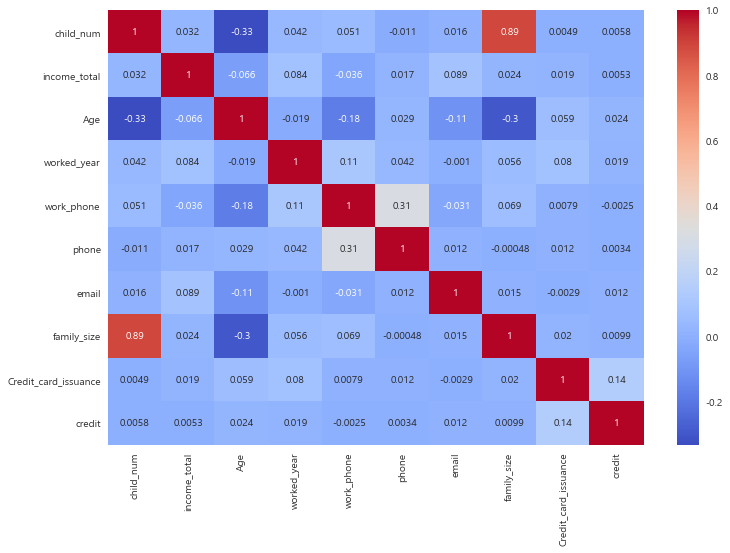

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(num_cols_data_cor, cmap='coolwarm', annot=True)

1. `child_num`과 `family_size`와는 0.89라는 높은 상관관계가 있음. 자녀 수가 많을수록 가족 규모가 커지기 때문임.
2. `Age`와 `family_size`는 -0.3으로 약한 음의 상관관계가 있음. 이는 나이가 많이 들수록 자녀의 독립 등으로 인해 가족 구성원 수가 적어지는 것으로 보임.

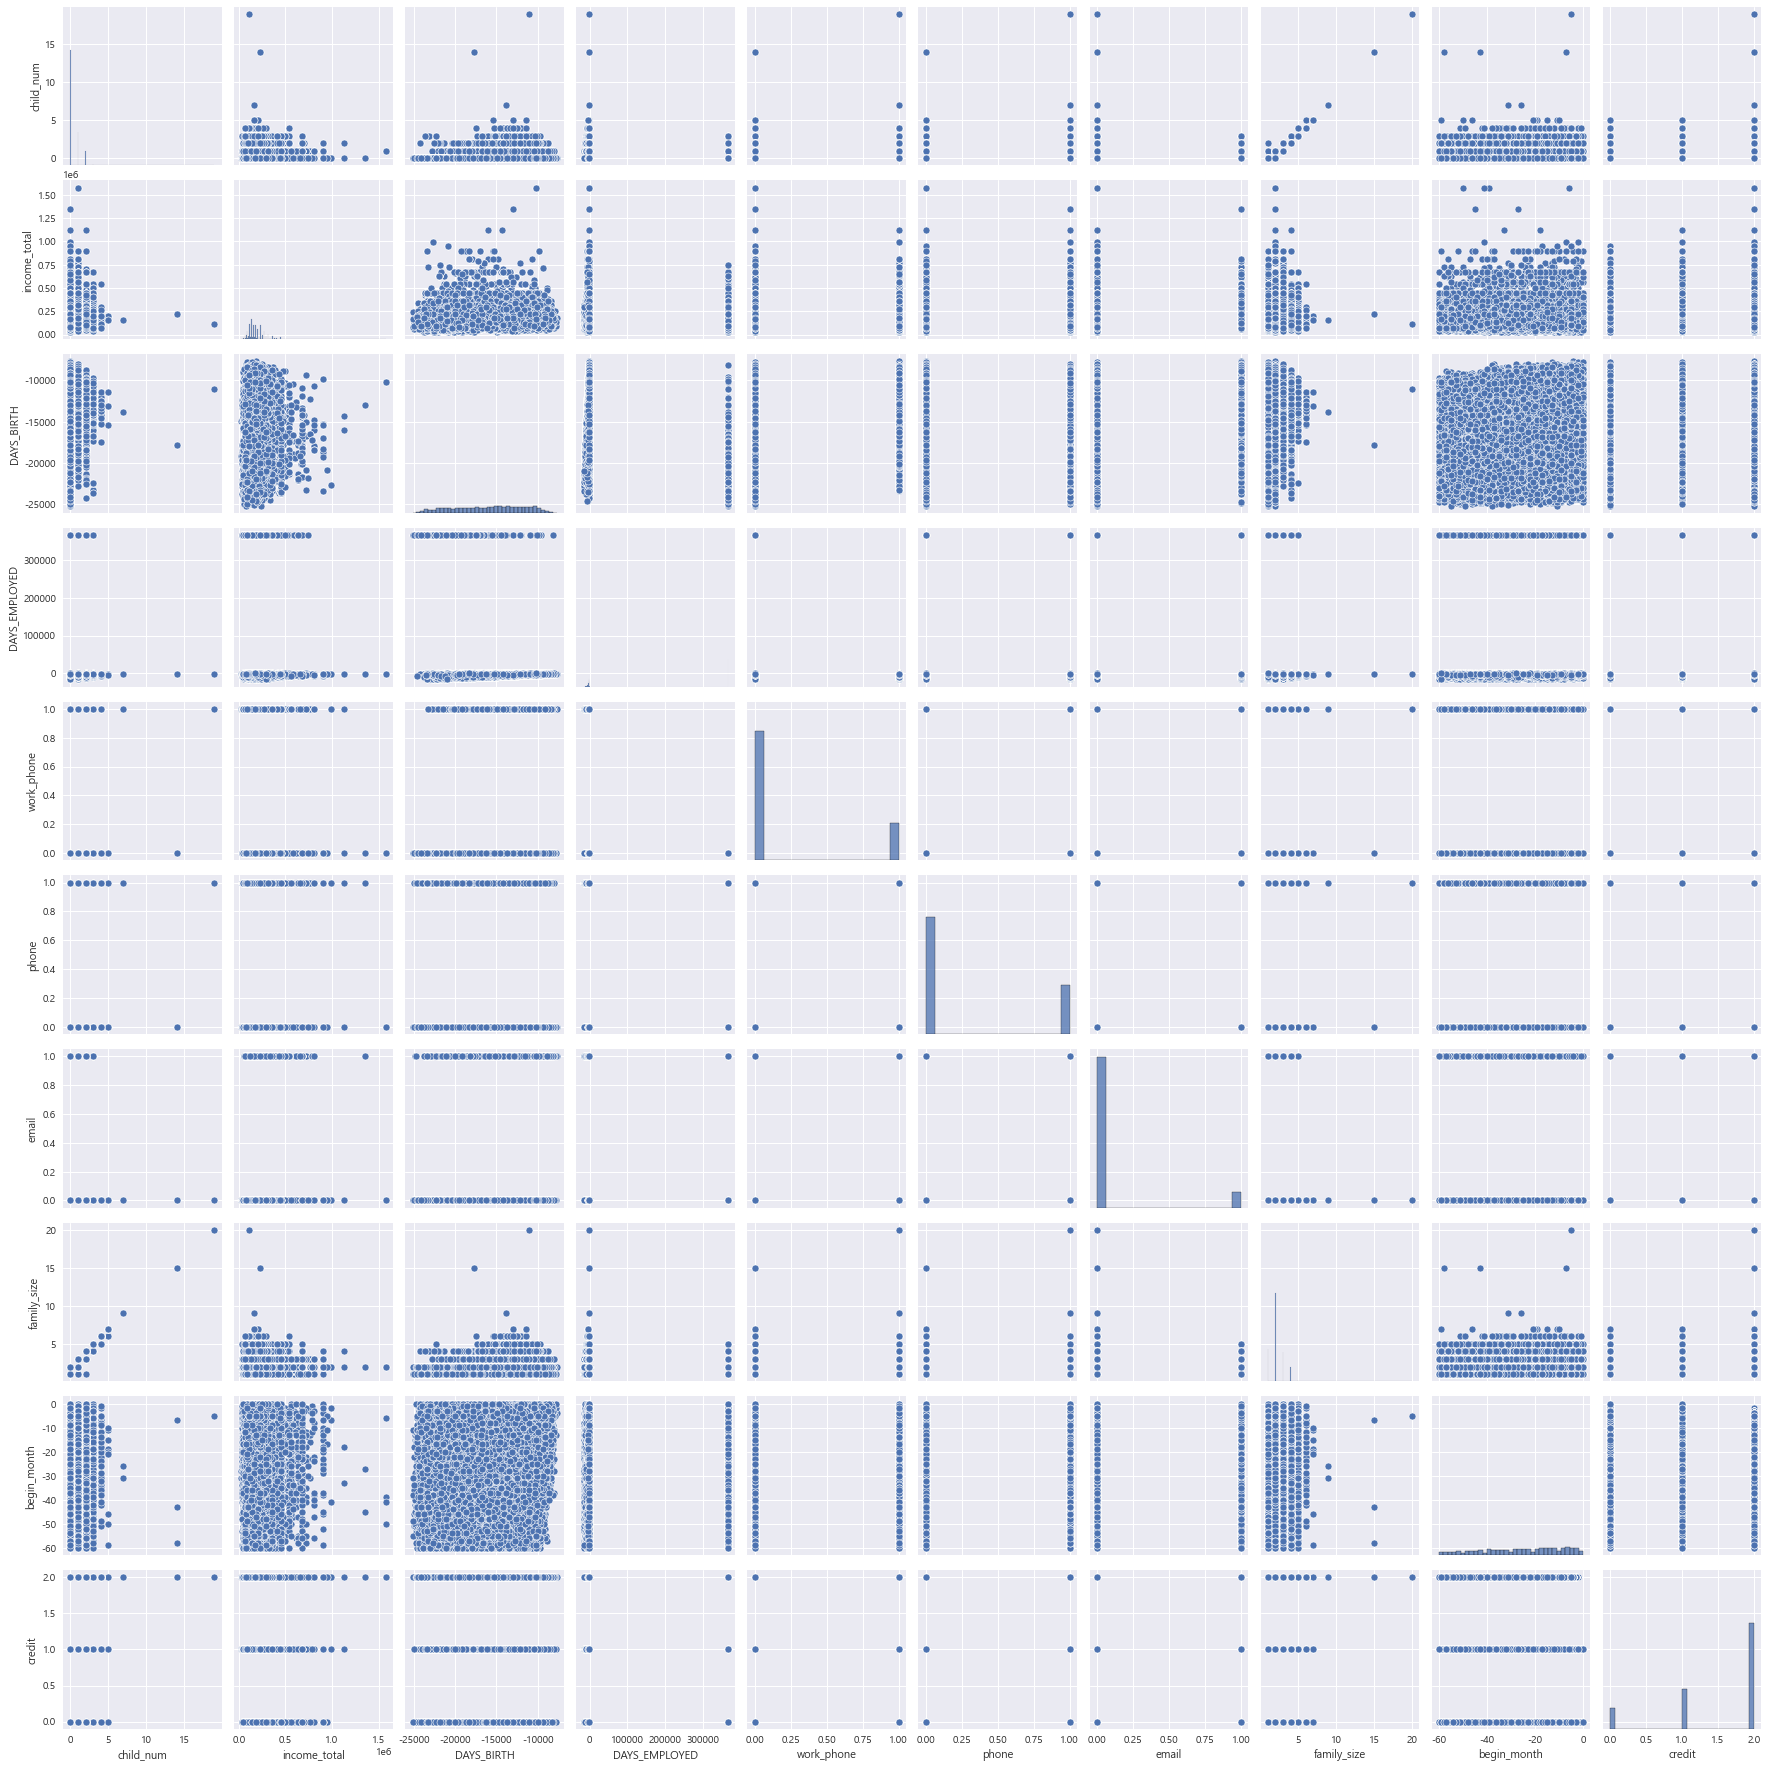

In [60]:
sns.pairplot(data[num_feature])

## 4. 파생변수 생성

### 4.1 Generation

`Age` 변수의 분포를 통해 미국 인구 조사의 기준에 따라 **청년층**, **중장년층**, **노년층**으로 나눔. 청년층은 19 ~ 34세, 중장년층은 35 ~ 54세, 노년층은 55세 이상으로 규정함.

In [61]:
data['Generation'] = data['Age'].apply(lambda x: 'Elderly' if x > 54 else 'Middle-aged' if x > 34 else 'Youth' if x > 20 else np.nan )

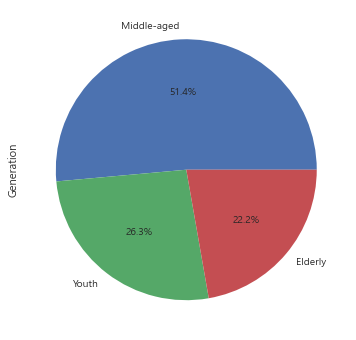

In [62]:
pie_plot('Generation')

### 4.2 Property Ownership

차량 소유 여부와 부동산 소유 여부를 합친 `Property_Ownership` feature를 생성함.

In [63]:
own = {'Y':1, 'N':0}
car = data['car'].map(own)
reality = data['reality'].map(own)
data['Property_Ownership'] = (car + reality).astype(object)

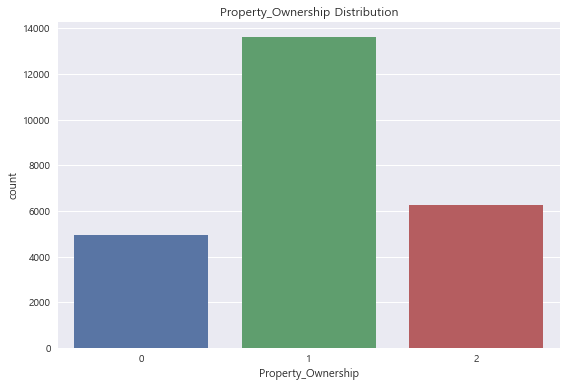

In [64]:
count_plot('Property_Ownership')

둘 중 한 가지 자산만 가진 경우가 가장 많고, 2개 모두 가진 사람, 모두 가지지 않은 사람 순으로 분포함.